In [1]:
#https://iaml.it/blog/alle-prese-con-pytorch-parte-1

## PyTorch vs. NumPy

In [2]:
import numpy as np
import torch

In [3]:
x = np.zeros((2,3))
y = torch.zeros(2,3)

print(type(x), x.dtype)
print(type(y), y.dtype)

<class 'numpy.ndarray'> float64
<class 'torch.Tensor'> torch.float32


In [4]:
#Automatisches Casting numpy zu torch
z = x + y
print(type(z), z.dtype)

<class 'torch.Tensor'> torch.float64


In [5]:
print("Vor Umwandlung: ", z)
#Umwandlung zu numpy
#Die zwei Objekte teilen den Speicherraum!

#Umwandlung nach numpy
xx = z.numpy()
#Veräderung des Wertes von xx (!)
xx += 1.0

print("Nach Umwandlung:", z)

Vor Umwandlung:  tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]], dtype=torch.float64)
Nach Umwandlung: tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)


In [6]:
#Broadcasting für beide
torch.Tensor([3, 2]) * torch.Tensor([[0, 1], [4, 2]])

tensor([[  0.,   2.],
        [ 12.,   4.]])

In [7]:
torch.Tensor([3, 2]) + torch.Tensor([[0, 1], [4, 2]])

tensor([[ 3.,  3.],
        [ 7.,  4.]])

In [8]:
#Unterschied: Dimensionen axis vs dim
x = np.random.randint(1, 10,(2,3))
print(x)
x.mean(axis=0)

[[7 5 9]
 [2 9 8]]


array([4.5, 7. , 8.5])

In [9]:
y = torch.tensor(torch.randint(1,10,(2,3)))
print(y)
y.mean(dim=0)

tensor([[ 4.,  7.,  4.],
        [ 6.,  4.,  3.]])


tensor([ 5.0000,  5.5000,  3.5000])

In [10]:
#Automatische Berechnung des Gradienten

#Vor der Version 0.4.0 war eine Variable notwendig. Eine Variable in Torch ist eine 
#Art Wrapper um einen Tensor. Alle Änderungen an der Variablen werden in Torch innerhalb
#eines Graphen gespeichert

#Siehe gif

#In jedem Moment ist es möglich, den Gradienten von einer Funktion bzgl. eines Tensors
#Die notwendigen Informationen werden über den Graphen 
from torch.autograd import Variable
v = Variable(torch.ones(1, 2), requires_grad=True) #Das Flag sagt, dass der Gradient bzgl. v berechenbar ist

v_new = torch.ones((1,2), requires_grad=True) #Geht auch jetzt

print(v.data) #Unterliegender Tensor
print(v.grad) #Nicht initialisierter Gradient. Wird beim Backprop belegt
print(v.grad_fn) #So hält PyTorch den "Überblick" über den Graphe


tensor([[ 1.,  1.]])
None
None


In [11]:
v_fn = torch.sum(v ** 2)
print(v_fn.data)    # 2 [torch.FloatTensor of size 1]
print(v_fn.grad_fn) # <SumBackward0 object at 0x000001EA03790B70>

tensor(2.)


In [12]:
#Graphen sind in PyTorch dynamisch und das Ergebnis der Operationen ist sofort verfügbar
# Nicht wie in anderen Bibliotheken 

#Ausserdem v_fn.grad_fn ist jetzt belegt mit einem Objekt, das die Operation darstellt, die die Variable im Graphen erzeugt hat

torch.autograd.grad(v_fn,v)#d(v_fn/v)

(tensor([[ 2.,  2.]]),)

In [13]:
#Oder
v1 = Variable(torch.Tensor([1, 2]), requires_grad=True)
v2 = Variable(torch.Tensor([3]), requires_grad=True)
v_fn = torch.sum(v1 * v2)

In [14]:
v_fn.backward()

In [15]:
print(v1.grad)

tensor([ 3.,  3.])


In [16]:
print(v2.grad)

tensor([ 3.])


## Reti neurali con PyTorch

In [170]:
from sklearn import datasets, model_selection
import torch
from torch import nn, optim
from torch.autograd import Variable

In [171]:
#Iris Dataset
data = datasets.load_iris()
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(data['data'], data['target'])

In [115]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [81]:
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [172]:
from torch.utils import data

In [174]:
Xtrain = torch.from_numpy(Xtrain).float()
Xtest = torch.from_numpy(Xtest).float()
ytrain = torch.from_numpy(ytrain)
ytest = torch.from_numpy(ytest)

train_data = data.TensorDataset(Xtrain, ytrain)

In [175]:
print(train_data[0])

(tensor([ 4.9000,  3.6000,  1.4000,  0.1000], dtype=torch.float32), tensor(0, dtype=torch.int32))


## Mini-Batching

Ein PyTorch-Loader ermöglicht die Extraktion von Mini-Batches mit fester Dimension (32) aus dem Datensatz. Man kann außerdem die Daten "mischen", nachdem während der Training-Phase der ganze Datensatz durchgelaufen wurde.

In [177]:
train_data_loader = 
data.DataLoader(train_data, batch_size=32, shuffle=True)

### Neuronales Netz erstellen

In [117]:
#Modul torch.nn

#1. Modell initialisieren
in_features = 4 #Size of each input sample
out_features = 3 #size of each output sample
linear_modell = nn.Linear(4,3)

Modelle von PyTorch kann man direkt aufrufen, als wären sie Funktionen. Jedes Modell kann 3 Parameter bekommen:
- in_features, die Dimension von jedem Train sample
- out_features, die Dimension von jedem Out sample
- bias Flag, das automatisch als True gesetzt wird

Falls nicht anderes angegeben, werden Gewichte und Bias-Vektor automatisch initialisiert. Um sie zu untersuchen:
- `modell.weights`
- `modell.bias`

In [56]:
print(linear_modell.weight)
print(linear_modell.bias)

Parameter containing:
tensor([[-0.3781,  0.4100, -0.1801,  0.1460],
        [ 0.1437,  0.2224,  0.0421,  0.2907],
        [-0.3957,  0.4232, -0.2028, -0.3855]])
Parameter containing:
tensor([ 0.1286,  0.0197,  0.1669])


In [57]:
#2. Vorhersage 
linear_modell(Xtrain[0:1])

tensor([[-1.6437,  2.4616, -2.8560]])

### Modell definieren mit `torch.nn.Module`

In [178]:
class CustomModel(nn.Module):

    def __init__(self):
        # Codice per l'inizializzazione
        #In dieser Phase müssen die Dimensionen explizit festgestellt werden
        super(CustomModel, self).__init__()
        self.hidden = nn.Linear(4, 10) #nur 1 Layer
        self.relu = nn.ReLU() #ReLU als Aktivierungsfunktion
        self.drop = nn.Dropout(0.2) #Dropout
        self.out = nn.Linear(10, 3) #Output layer


    def forward(self, x):
        # Codice per la forward pass
        x = self.relu(self.hidden(x))
        return self.out(self.drop(x))

In [181]:
net = CustomModel()
net(Variable(Xtrain[0:1].double()))

tensor([[-0.3488, -1.1158, -0.5085]])

In [182]:
print(net)

CustomModel(
  (hidden): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (drop): Dropout(p=0.2)
  (out): Linear(in_features=10, out_features=3, bias=True)
)


In [183]:
params = list(net.parameters())
"""
Das Modell enthält vier Variablen (Parameter):
- 2 Matrizen für das Modul "hidden"
- 2 Matrizen für das Modul out
- Aktivierungs-Funktion und Dropout verfügen über keine veränderbaren Elemente
"""
print(len(params))

4


In [184]:
#Matriz im hidden
params[0]

Parameter containing:
tensor([[-0.0572, -0.4209,  0.1912, -0.3214],
        [-0.4439, -0.3029, -0.4806,  0.4752],
        [-0.1467,  0.2918,  0.2821, -0.1402],
        [ 0.1045, -0.4957, -0.4089,  0.3862],
        [-0.2103,  0.2899,  0.4866,  0.1740],
        [-0.1592, -0.2207,  0.2786,  0.2478],
        [-0.2542, -0.1431, -0.4053, -0.1773],
        [ 0.4671,  0.4594,  0.0713,  0.4903],
        [-0.3344, -0.2171,  0.2291, -0.0523],
        [-0.3880,  0.0780,  0.2479, -0.0812]])

In [185]:
#Hidden bias 
params[1]

Parameter containing:
tensor([-0.4804,  0.0482, -0.4793,  0.2383, -0.4524, -0.2515,  0.0143,
        -0.3773, -0.4165,  0.4315])

In [186]:
#Out Matriz
params[2]

Parameter containing:
tensor([[ 0.0983,  0.0238, -0.3012,  0.2116, -0.1005, -0.2183,  0.0974,
         -0.0709, -0.2014, -0.1451],
        [ 0.1445,  0.0929, -0.0502, -0.0109,  0.2117, -0.0500,  0.1771,
         -0.1964, -0.2392,  0.1495],
        [ 0.1761,  0.2689, -0.1101, -0.2165,  0.0362, -0.1333, -0.2767,
         -0.1224, -0.2394, -0.2648]])

In [187]:
#Out bias 
params[3]

Parameter containing:
tensor([ 0.1008, -0.2578,  0.0803])

In [188]:
print(sum([torch.numel(p) for p in params]))

83


In [189]:
named_params = [p for p in net.named_parameters()]
print(named_params[-1])

('out.bias', Parameter containing:
tensor([ 0.1008, -0.2578,  0.0803]))


## Alternativen für die Definition von Modellen

In [128]:
import torch.nn.functional as F # Funktion-Modul

In [129]:
def logreg(x):
    return F.softmax(lin(x), dim=1)

In [130]:
#Einige Module aus nn verfügen über den Flag inplace

relu_inplace = nn.ReLU(inplace=True) #Erzeugt keine vorläufige Daten, überschreibt Speicherplatz aus vorigen Variablen
#Nicht empfohlen

## `nn.Sequential`

In [131]:
net_sequential = nn.Sequential(
        nn.Linear(4, 10),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(10, 3)
)
#Genau so wie CustomModel

### Modellparameter initialisieren 

Lineare Transformation:
- Gewichte sollen normal verteilt sein
- Bias soll eine Kostante sein

In [72]:
#net == CustomModel
#torch.nn.init.normal_(net.hidden.weight.data)
#torch.nn.init.constant_(net.hidden.bias.data, 0.1)

In [190]:
print(torch.nn.init.normal_(net.hidden.weight))
print(torch.nn.init.constant_(net.hidden.bias, 0.1))

Parameter containing:
tensor([[ 0.7305,  0.3964, -0.2573, -0.0011],
        [-0.4309,  0.9170, -1.1736, -0.9769],
        [-0.2152, -0.9050,  1.0083, -0.0172],
        [-2.2362,  0.1824,  0.5407,  1.0028],
        [ 0.0625, -1.3347,  0.4600,  0.9234],
        [ 0.9169,  0.5341,  0.2630, -0.0013],
        [ 0.7701,  0.2374, -0.2747,  1.0766],
        [ 0.6155, -0.9617,  0.9946, -0.0223],
        [-1.4404, -0.1611, -0.3173,  0.0046],
        [ 1.2417, -0.2064,  0.5981, -0.6571]])
Parameter containing:
tensor([ 0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000,
         0.1000,  0.1000,  0.1000])


In [192]:
#Falls Modell besonders komplex ist
for m in net.modules():
    if type(m) in ['Linear']:
        torch.nn.init.normal_(m.weight.data)
        torch.nn.init.constant_(m.bias.data, 0.1)

## Netz optimieren

In [193]:
net = CustomModel()
net = net.double()
loss = nn.MSELoss() #gut für Klassifizierung
opt = torch.optim.Adam(params=net.parameters(), lr=0.01) #Adam konvergiert schnell

In [214]:
Xt = Variable(Xtrain)
yt = Variable(ytrain)

def train_step(x,y):
    torch.DoubleTensor(x.double())
    torch.DoubleTensor(y.double())
    #torch.set_default_tensor_type('torch.DoubleTensor')
    #Training-Modalität
    net.train()
    
    #Vorhersagen berechnen
    y_pred = net(x)
    
    # Calcola funzione costo
    loss_epoch = loss(y_pred, y)

  # Esegui back-propagation
    loss_epoch.backward()

  # Aggiorna le variabili
    opt.step()

  # Resetta il gradiente
    opt.zero_grad()

In [216]:
def accuracy(y_pred, y_true):
    correct = (y_pred.max(dim=1)[1] == y_true)
    return torch.mean(correct.float()).data.numpy()

In [217]:
for epoch in range(1000):
    net.train()
    for Xb, yb in train_data_loader:
        train_step(Variable(Xb), Variable(yb))

RuntimeError: Expected object of type torch.DoubleTensor but found type torch.FloatTensor for argument #4 'mat1'

## CNN

In [218]:
from torchvision import datasets
fmnist = datasets.FashionMNIST('fmnist', train=True, download=True)

Processing...
Done!


In [219]:
fmnist_test = datasets.FashionMNIST('fmnist', train=False)

In [220]:
print(len(fmnist))
# Ritorna: 60000
print(fmnist[0])

60000
(<PIL.Image.Image image mode=L size=28x28 at 0x18E312A55F8>, tensor(9))


In [221]:
from torchvision import transforms
fmnist = datasets.FashionMNIST('fmnist', transform=transforms.ToTensor())

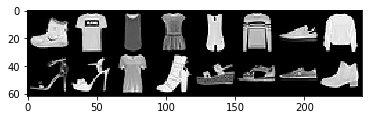

In [223]:
# Creiamo un loader per mini-batch di sedici immagini
from torch.utils import data
data_loader = data.DataLoader(fmnist, batch_size=16)

# Prendiamo il primo mini-batch
xb, yb = next(iter(data_loader))

# Lo stampiamo su schermo
from torchvision import utils
import matplotlib.pyplot as plt
out = utils.make_grid(xb)
plt.imshow(out.numpy().transpose((1, 2, 0)))

In [224]:
# Dobbia trasformazione
tr = transforms.Compose([
    transforms.RandomRotation(degrees=75),
    transforms.ToTensor()
])
fmnist = datasets.FashionMNIST('fmnist', train=True, transform=tr)

In [226]:
tr = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x < 0.5).float())
])
fmnist = datasets.FashionMNIST('fmnist', transform=tr)

In [228]:
# Calcola media e variazione standard
import numpy as np
im_mean = np.mean(fmnist.train_data.numpy())
im_std = np.std(fmnist.train_data.numpy())

# Applica la normalizzazione
tr = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((im_mean / 255.0,), (im_std / 255.0,))
])
fmnist = datasets.FashionMNIST('fmnist', train=True, transform=tr)

In [229]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)